Lead Scoring Case study

Step 1: Importing Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
lead_df = pd.read_csv(r'C:\Users\arnav\Downloads\Lead Scoring Assignment\Leads.csv')
lead_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\arnav\\Downloads\\Lead Scoring Assignment\\Leads.csv'

In [ ]:
lead_df.shape

(9240, 37)

In [ ]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Step 2: Data Cleaning and Preparation

Let us first check column wise null percentage

In [ ]:
lead_null = round((lead_df.isna().sum())/len(lead_df.index) * 100,2)
print(lead_null[lead_null>0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


We can observe that there are multiple columns which have a null percentage of more than 30%.
Let us drop all columns with more than 30% missing values

In [ ]:
cols = lead_df.columns
for i in cols:
    if((100*(lead_df[i].isnull().sum()/len(lead_df.index)))>=30):
        lead_df.drop(i,1,inplace=True)

In [ ]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

As visible above, all the columns which have less than 30% null values have been removed

Let us check the remaining columns and accordingly remove columns which are not required for our analysis.
We we look into the excel data we can see that there are many columns with no and yes as data. Let us visually represent these columns

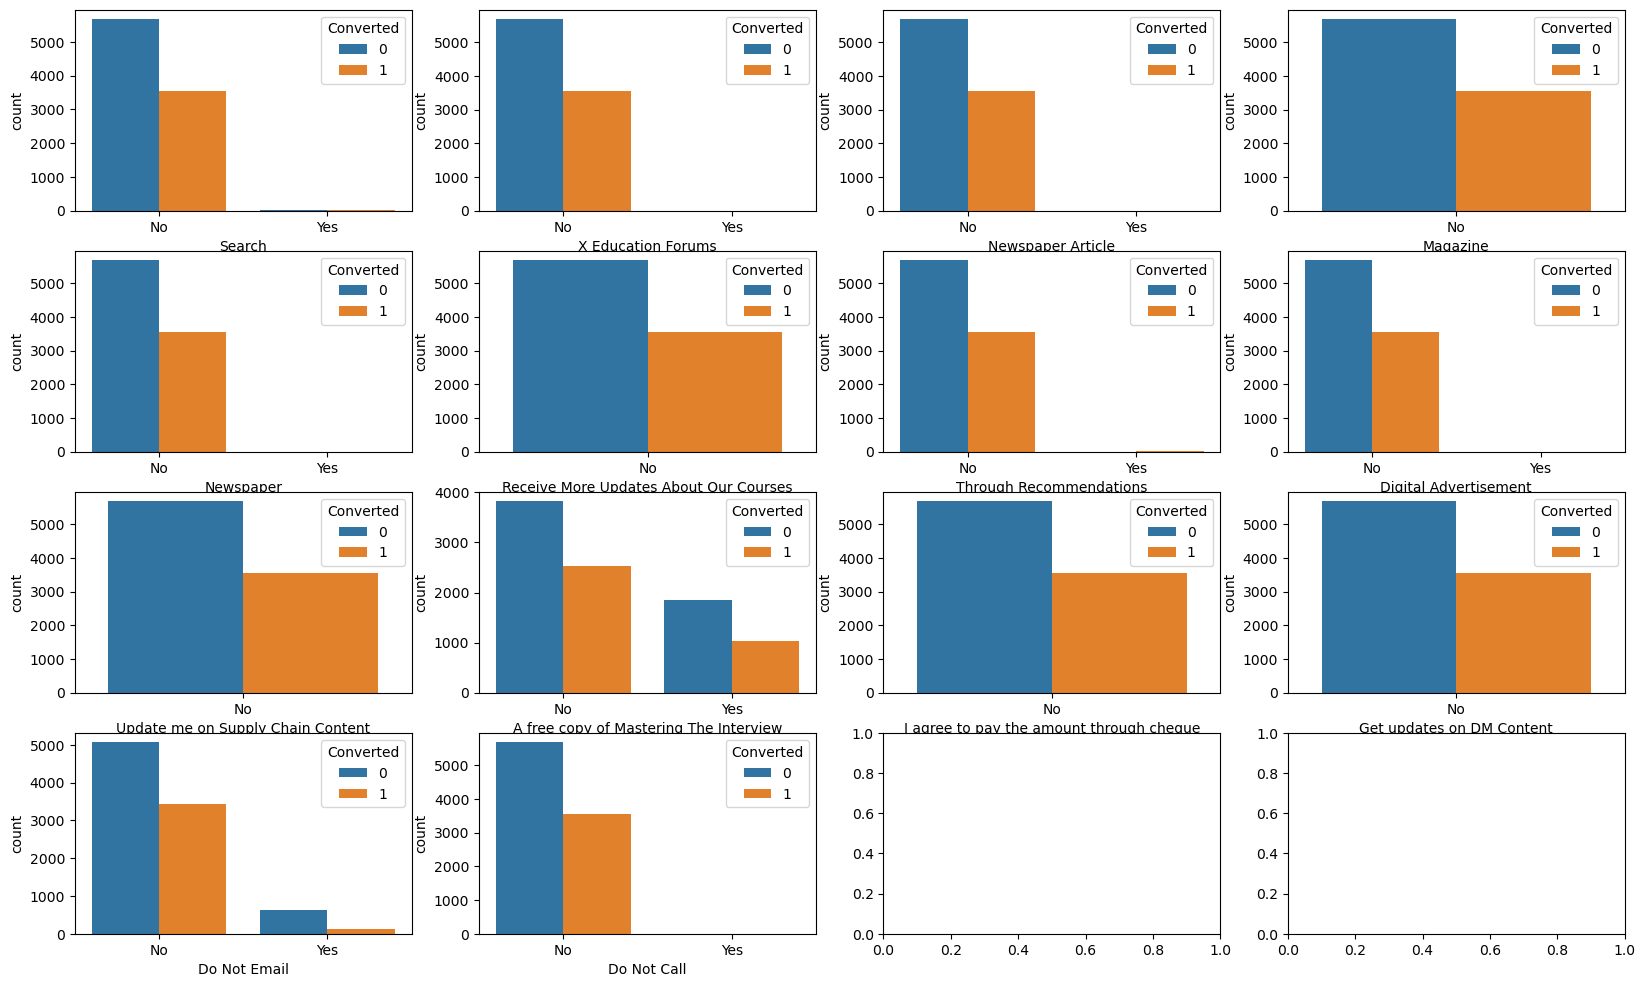

In [ ]:
fig, axs = plt.subplots(4,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = lead_df, ax = axs[0,0])
sns.countplot(x = "Magazine", hue = "Converted", data = lead_df, ax = axs[0,3])
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_df, ax = axs[0,2])
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_df, ax = axs[0,1])
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_df, ax = axs[1,0])
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_df, ax = axs[1,3])
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_df, ax = axs[1,2])
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_df, ax = axs[1,1])
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =lead_df, ax = axs[2,0])
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_df, ax = axs[2,3])
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_df, ax = axs[2,2])
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_df, ax = axs[2,1])
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df, ax = axs[3,0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_df, ax = axs[3,1])
plt.show()

Most of the columns above contain No as their value we can drop them

Let us now check the other columns

In [ ]:
lead_df['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [ ]:
lead_df['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [ ]:
lead_df['Lead Source'].value_counts().head()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

In [ ]:
lead_df['Last Activity'].value_counts().head()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

In [ ]:
lead_df['Specialization'].value_counts().head()

Select                       1942
Finance Management            976
Human Resource Management     848
Marketing Management          838
Operations Management         503
Name: Specialization, dtype: int64

In [ ]:
lead_df['Country'].value_counts().head()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
Name: Country, dtype: int64

In [ ]:
lead_df['What matters most to you in choosing a course'].value_counts().head()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
lead_df['What is your current occupation'].value_counts().head()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

In [ ]:
lead_df['How did you hear about X Education'].value_counts().head()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Name: How did you hear about X Education, dtype: int64

In [ ]:
lead_df['City'].value_counts().head()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Name: City, dtype: int64

In [ ]:
lead_df['Lead Profile'].value_counts().head()

Select                   4146
Potential Lead           1613
Other Leads               487
Student of SomeSchool     241
Lateral Student            24
Name: Lead Profile, dtype: int64

We can observe that there are certain select values in multiple columns hence let us impute these columns

In [ ]:
miss_val = {'Lead Source':'Google', 'TotalVisits':'0.0', 'Page Views Per Visit':'0.0', 'Last Activity':'Email Opened', 'Country':'India',
              'What is your current occupation':'Unemployed', 
               'What matters most to you in choosing a course':'Better Career Prospects', 'City':'Select', 'Lead Profile':'Select','How did you hear about X Education':'Select',
                'Specialization':'Select'}

lead_df = lead_df.fillna(value = miss_val)

Let us now check and see if there are null values

In [ ]:
lead_df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

There are certain columns like Speciliazation, Lead profile, How did you hear about X Education which have select as there value and we can drop them
Columns country and city have pne major value that is India and Mumbai let us drop them as well.

Let us now check the conversions of a few columns

1) What is your current occupation 

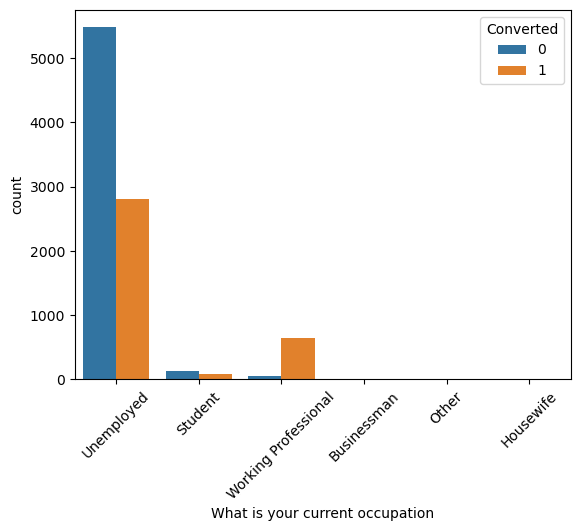

In [ ]:
c1=sns.countplot(x='What is your current occupation', hue='Converted' , data = lead_df)
c1.set_xticklabels(c1.get_xticklabels(),rotation=45)
plt.show()

We can observe that the highest conversion rate is that of working professionals.
Students have a pretty moderte conversion rate.
Unemployed people have a number of leads however the conversion rate is pretty low.

2) Lead Source

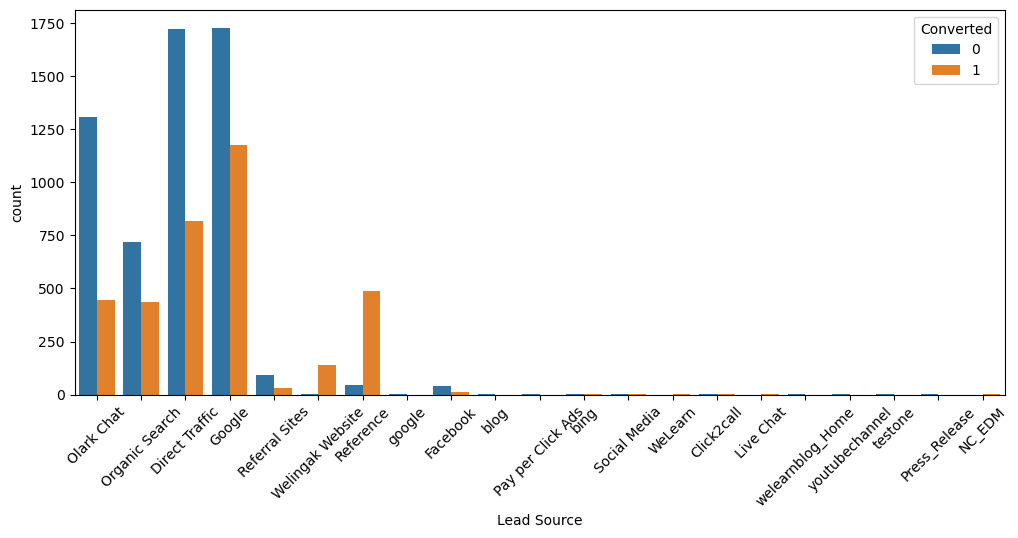

In [ ]:
plt.figure(figsize=(12,5))
c2=sns.countplot(x= 'Lead Source', hue='Converted' , data =lead_df)
c2.set_xticklabels(c2.get_xticklabels(),rotation=45)
plt.show()

We can observe that most Number of conversions are for Google.
Welingak websites and References have a high conversion rate.
Direct Traffic and Olark chat have a lower conversion rate.


3) What matters to you in choosing a course

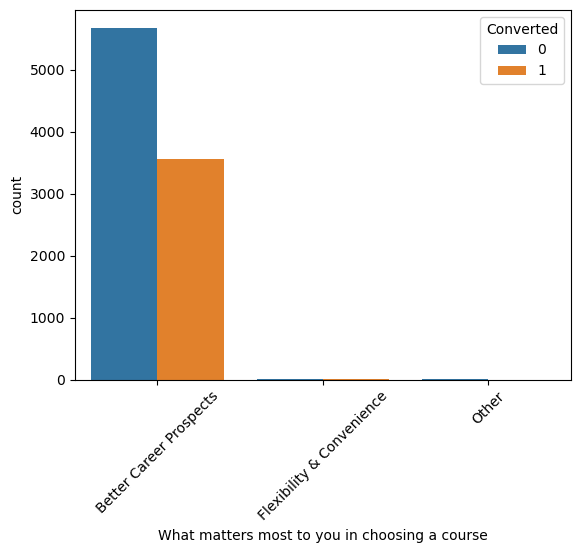

In [ ]:
c3=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = lead_df)
c3.set_xticklabels(c3.get_xticklabels(),rotation=45)
plt.show()

We can observe Better career prospects has the highest number of leads as well as conversions. Since most values belong to this category we can drop this column.

Let us now drop the columns which we dont require

In [ ]:
cols_to_drop = (['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
              'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
              'A free copy of Mastering The Interview', 'City', 'Lead Profile', 
              'How did you hear about X Education','Specialization', 'Country' , 'What matters most to you in choosing a course' ,
              'Do Not Call','Last Activity' ,'Last Notable Activity', 
              'Do Not Email' , 'Prospect ID' ,'Lead Number'])

In [ ]:
lead_new = lead_df.drop(cols_to_drop,1)

In [ ]:
lead_new.shape

(9240, 7)

In [ ]:
lead_new.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed


In [ ]:
lead_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Lead Origin                      9240 non-null   object
 1   Lead Source                      9240 non-null   object
 2   Converted                        9240 non-null   int64 
 3   TotalVisits                      9240 non-null   object
 4   Total Time Spent on Website      9240 non-null   int64 
 5   Page Views Per Visit             9240 non-null   object
 6   What is your current occupation  9240 non-null   object
dtypes: int64(2), object(5)
memory usage: 505.4+ KB


Let us check the conversion rate of this data

In [ ]:
Conversion = (sum(lead_new['Converted'])/len(lead_new['Converted'].index))*100
Conversion

38.53896103896104


We can observe that the conversion rate of this data stands at 38.5
Let us now convert 'TotalVisits' and 'Page Views Per Visit' to float.

In [ ]:
lead_new['TotalVisits']= lead_new['TotalVisits'].astype('float64')


In [ ]:
lead_new['Page Views Per Visit']=lead_new['Page Views Per Visit'].astype('float64')

In [ ]:
lead_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Converted                        9240 non-null   int64  
 3   TotalVisits                      9240 non-null   float64
 4   Total Time Spent on Website      9240 non-null   int64  
 5   Page Views Per Visit             9240 non-null   float64
 6   What is your current occupation  9240 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 505.4+ KB


In [ ]:
lead_new.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


Let us now check for outliers in the numerical columns, And if found let us treat the outliers

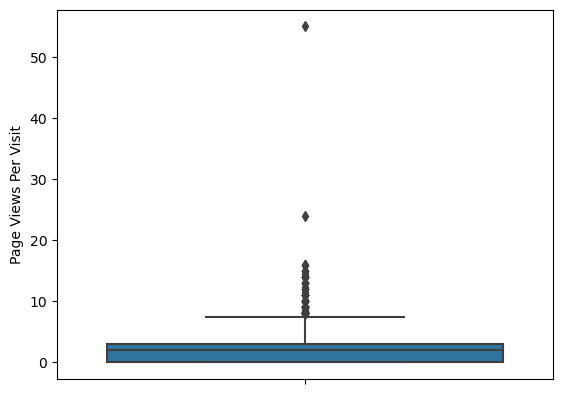

In [ ]:
sns.boxplot(y=lead_new['Page Views Per Visit'])
plt.show()

We can observe outliers in the above boxplot

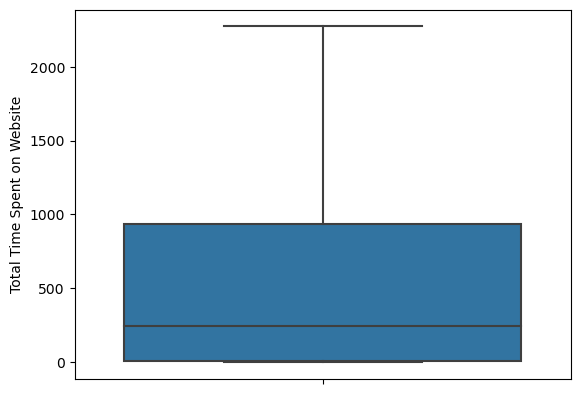

In [ ]:
sns.boxplot(y=lead_new['Total Time Spent on Website'])
plt.show()

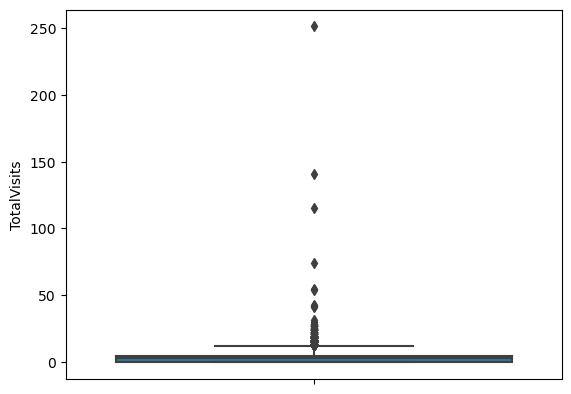

In [ ]:
sns.boxplot(y=lead_new['TotalVisits'])
plt.show()

We can observe outliers in the above boxplot

We can see that "Page Views Per Visit" and "TotalVisits" have outliers and hence they need to be treated.

In [ ]:
outl_check = lead_new[["Page Views Per Visit","TotalVisits"]]

In [ ]:
outl_check.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Page Views Per Visit,TotalVisits
count,9240.000000,9240.000000
mean,2.327787,3.394156
std,2.164258,4.836682
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,3.000000
75%,3.000000,5.000000
90%,5.000000,7.000000
95%,6.000000,10.000000
99%,9.000000,17.000000


From the above we can observe that 95% of the data is Normal.
Let us cap the data to 95%.

In [ ]:
percentiles = lead_new['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_new['Page Views Per Visit'][lead_new['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_new['Page Views Per Visit'][lead_new['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

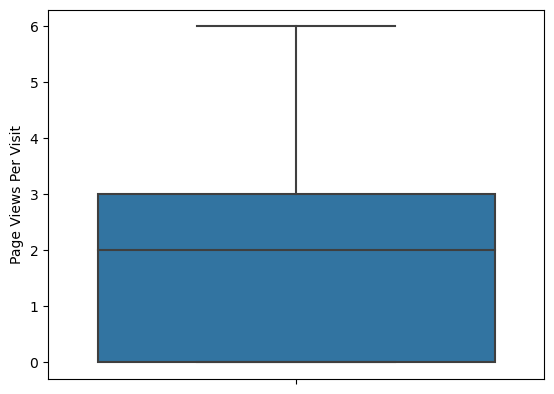

In [ ]:
sns.boxplot(y=lead_new["Page Views Per Visit"])
plt.show()

We can now observe that there are no outliers

In [ ]:
percentiles = lead_new['TotalVisits'].quantile([0.05,0.95]).values
lead_new['TotalVisits'][lead_new['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_new['TotalVisits'][lead_new['TotalVisits'] >= percentiles[1]] = percentiles[1]

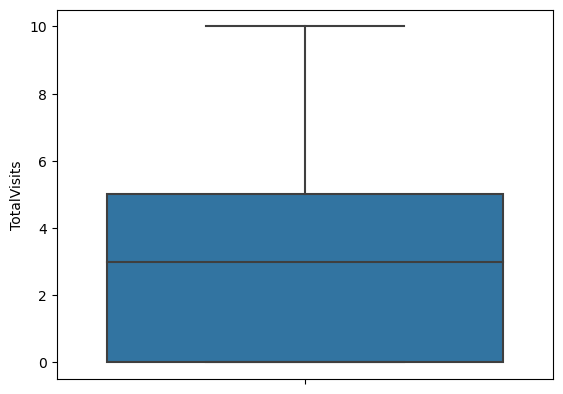

In [ ]:
sns.boxplot(y=lead_new["TotalVisits"])
plt.show()

We can observe now that there are no outliers.

Let us now plot all the numerical varaibles and check which among them have the highest conversions.


<Axes: xlabel='Converted', ylabel='TotalVisits'>

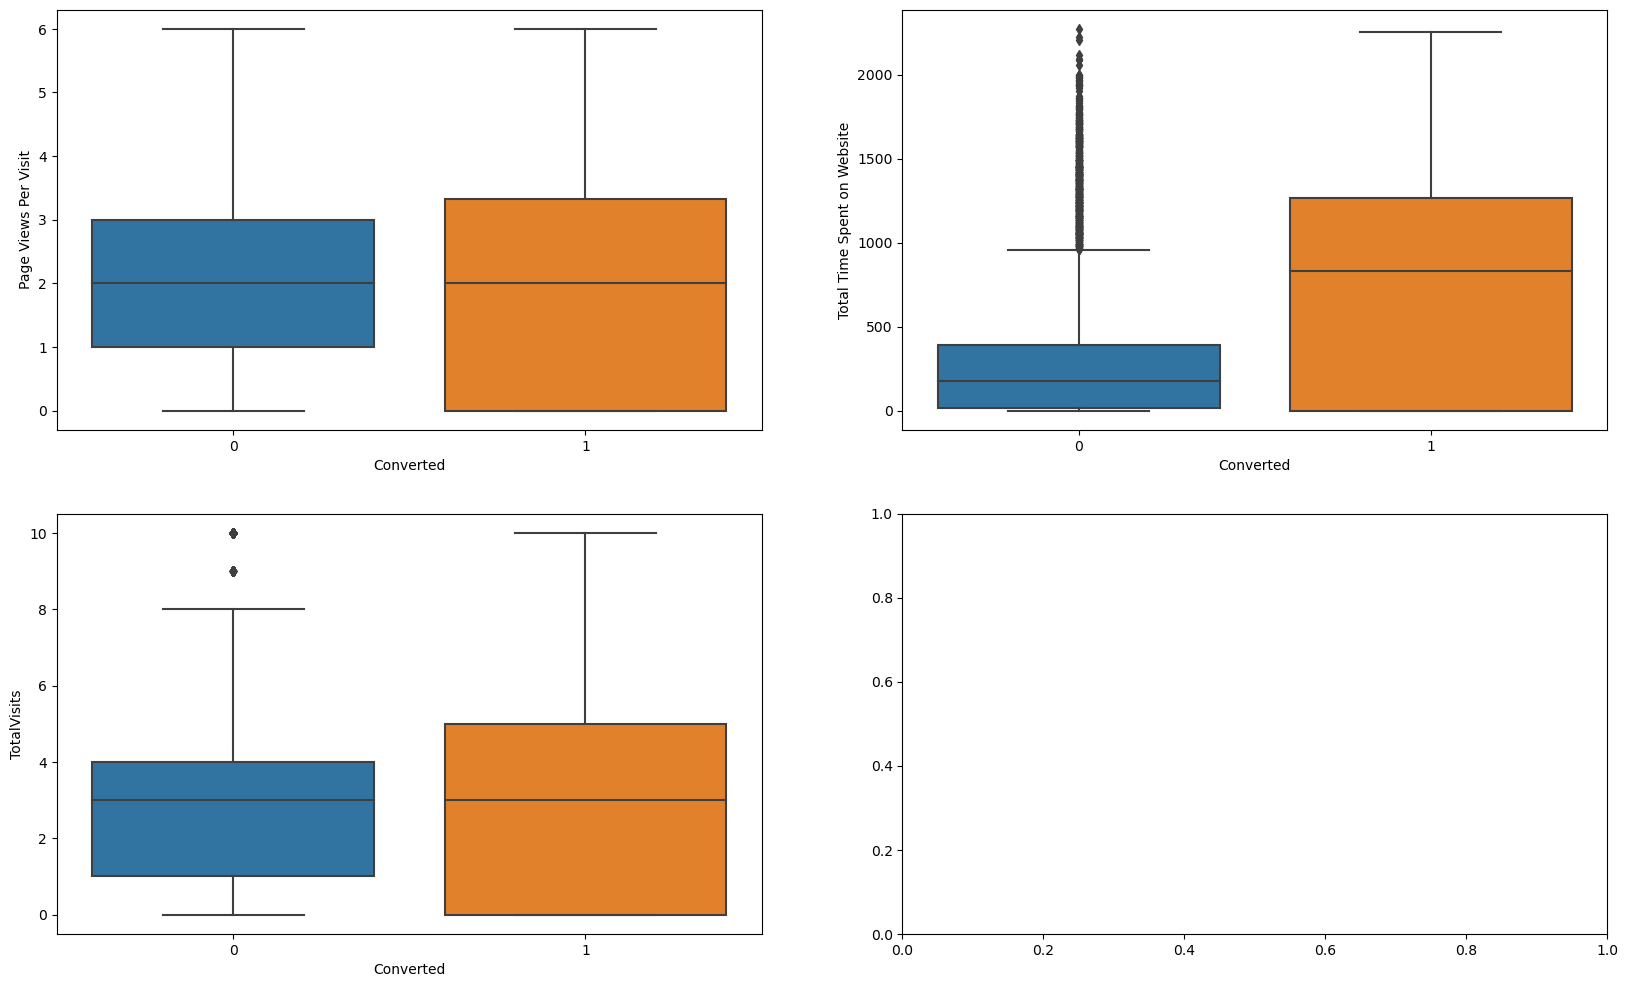

In [ ]:
fig, axs = plt.subplots(2,2,figsize = (20,12))
sns.boxplot(y = 'Page Views Per Visit', x = "Converted", data = lead_new, ax = axs[0,0])
sns.boxplot(y = 'Total Time Spent on Website', x = "Converted", data = lead_new, ax = axs[0,1])
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_new, ax = axs[1,0])

From the above we can observe that the Total time spent on Website has the highest conversion of leads. The rest of the columns have a moderate conversion of leads.

Creation of Dummy Variables

In [ ]:
dum = pd.get_dummies(lead_new[['Lead Origin', 'Lead Source',"What is your current occupation"]], drop_first=True)

Let us concat the dummies to the dataframe

In [ ]:
lead_new = pd.concat([lead_new, dum], axis=1)

In [ ]:
lead_new.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0.0,0,0.0,Unemployed,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,5.0,674,2.5,Unemployed,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Student,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unemployed,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed,1,0,0,...,0,0,0,0,0,0,0,0,1,0


Let us now drop the main columns from which these dummies have been created.

In [ ]:
lead_1 = lead_new.drop(['Lead Origin', 'Lead Source',"What is your current occupation"], 1)

In [ ]:
lead_1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Let us now split the data into training and test sets.

Step 3: Test-Train data split

In [ ]:
X=lead_1.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y = lead_1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Step 4: Feature Scaling

In [ ]:
scaler = StandardScaler()

X_train[["TotalVisits",'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[["TotalVisits",'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,-1.121955,-0.885371,-1.234699,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,0.313260,0.005716,-0.493295,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,0.672063,-0.691418,0.158918,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,0.672063,1.365219,1.552535,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3934,-1.121955,-0.885371,-1.234699,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Step 5: Correlations

Let us plot a heatmap and observe the correlations between different columns

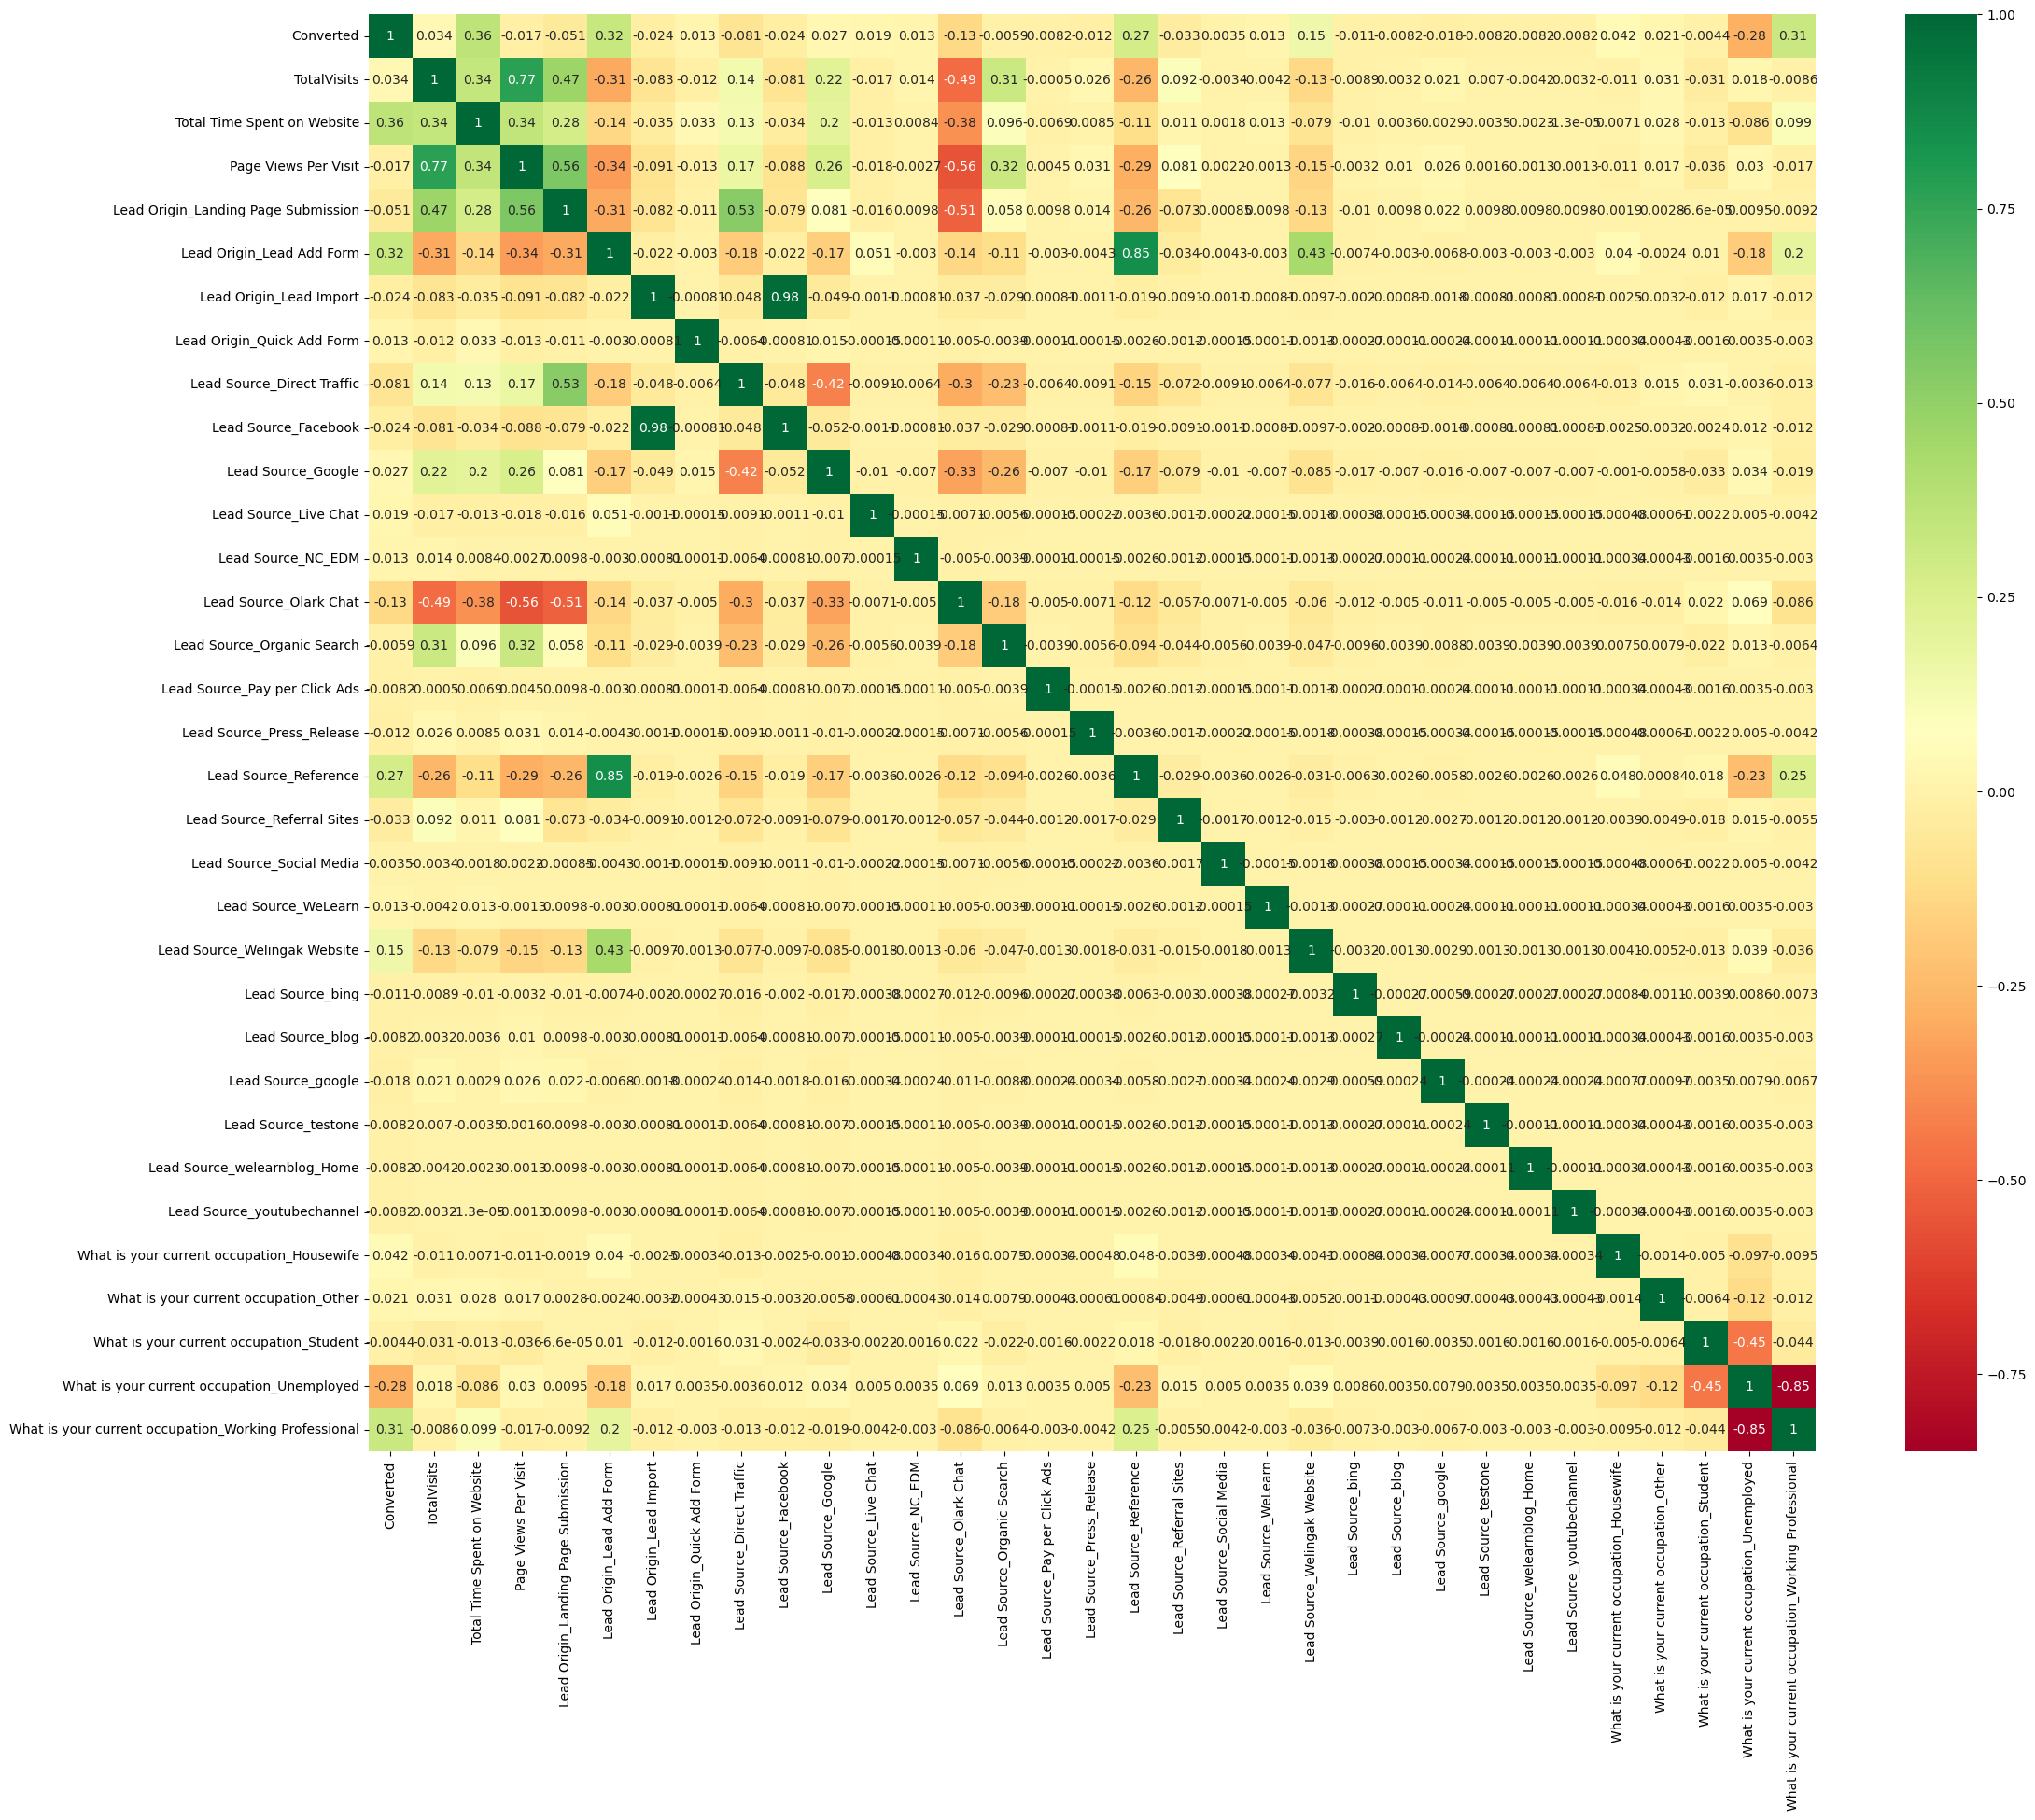

In [ ]:
plt.figure(figsize = (25,20))
sns.heatmap(lead_1.corr(),annot = True, cmap = 'RdYlGn')
plt.show()

In [ ]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission','What is your current occupation_Unemployed'],1)
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission','What is your current occupation_Unemployed'],1)

Let us now start building the model

Step 6: Model Building

In [ ]:
logmod1 =  sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmod1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3033.5
Date:                Sat, 13 Jan 2024   Deviance:                       6067.1
Time:                        12:11:50   Pearson chi2:                 7.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3238
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2211      0.093     -2.367      0.018      -0.404      -0.038
TotalVisits                                              0.2948      0.049      6.049      0.000       0.199       0.390
Total Time Spent on Website                              1.0926      0.037     29.486      0.000       1.020       1.165
Page Views Per Visit                                    -0.1012      0.055     -1.856      0.063      -0.208       0.006
Lead Origin_Lead Add Form                                3.0877      0.453      6.820      0.000       2.200       3.975
Lead Origin_Lead Import                                  0.5407      1.963      0.275      0.783      -3.306       4.387
Lead Origin_Quick Add Form                              21.3495   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -1.2054      0.125     -9.624      0.000      -1.451      -0.960
Lead Source_Facebook                                    -1.4717      1.964     -0.749      0.454      -5.321       2.378
Lead Source_Google                                      -0.8215      0.123     -6.695      0.000      -1.062      -0.581
Lead Source_Live Chat                                   21.8726   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      22.4574   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Organic Search                              -1.0665      0.154     -6.922      0.000      -1.369      -0.765
Lead Source_Pay per Click Ads                          -22.5698   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -24.5456   4.94e+04     -0.000      1.000   -9.68e+04    9.67e+04
Lead Source_Reference                                   -0.0299      0.494     -0.061      0.952      -0.998       0.938
Lead Source_Referral Sites                              -1.5465      0.313     -4.934      0.000      -2.161      -0.932
Lead Source_Social Media                                 0.1652      1.519      0.109      0.913      -2.812       3.142
Lead Source_WeLearn                                     22.4945   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             1.9485      0.849      2.295      0.022       0.284       3.613
Lead Source_bing                                         0.1152      1.238      0.093      0.926      -2.311       2.542
Lead Source_blog                                       -23.7227   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                                     -23

We can observe that there are a lot of features hence let us use feature selection using RFE so that only the essential features can be included in model building

Step 7: Feature selection by making use of Recursive Feature Elimination

In [ ]:
logreg = LogisticRegression()

In [ ]:
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([False,  True, False,  True,  True, False,  True,  True,  True,
       False, False,  True, False,  True, False,  True, False, False,
        True, False,  True,  True, False, False,  True,  True, False,
       False,  True])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 12),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 4),
 ('Lead Source_NC_EDM', False, 2),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 6),
 ('Lead Source_Press_Release', True, 1),
 ('Lead Source_Reference', False, 10),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_WeLearn', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 14),
 ('Lead Source_blog', True, 1),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 15),
 ('Lead Source_welearnblog_Home', False, 3),
 ('Lead Source_youtubechannel', True, 1),
 ('What is your current oc

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Quick Add Form',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'What is your current occupation_Other',
       'What is your current occupation_Student'],
      dtype='object')

Let us now assess the model

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logmod2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3055.8
Date:                Sat, 13 Jan 2024   Deviance:                       6111.7
Time:                        12:24:12   Pearson chi2:                 7.83e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3192
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3769      0.075     -5.058      0.000      -0.523      -0.231
Total Time Spent on Website                              1.1036      0.037     30.056      0.000       1.032       1.176
Lead Origin_Lead Add Form                                3.0142      0.183     16.432      0.000       2.655       3.374
Lead Origin_Lead Import                                  0.2071      2.011      0.103      0.918      -3.733       4.148
Lead Source_Direct Traffic                              -1.0000      0.103     -9.681      0.000      -1.202      -0.798
Lead Source_Facebook                                    -1.1823      2.012     -0.588      0.557      -5.126       2.761
Lead Source_Google                                      -0.6060      0.097     -6.275      0.000      -0.795      -0.417
Lead Source_Organic Search                              -0.7518      0.120     -6.262      0.000      -0.987      -0.516
Lead Source_Press_Release                              -24.0077   5.11e+04     -0.000      1.000      -1e+05       1e+05
Lead Source_Referral Sites                              -1.2270      0.301     -4.075      0.000      -1.817      -0.637
Lead Source_Welingak Website                             1.9851      0.737      2.695      0.007       0.541       3.429
Lead Source_blog                                       -23.5791   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                                     -23.4961   3.28e+04     -0.001      0.999   -6.42e+04    6.42e+04
Lead Source_youtubechannel                             -23.1954   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
What is your current occupation_Housewife               23.6503   2.23e+04      0.001      0.999   -4.37e+04    4.37e+04
What is your current occupation_Working Professional     2.8928      0.179     16.138      0.000       2.541       3.244
========================================================================================================================
"""

We can observe that there are many elements which have a high p-value 
let us go ahead and remove the column what is your current occupation_Housewife.


In [ ]:
col = col.drop('What is your current occupation_Housewife',1)

Let us now build model - 3

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logmod3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3061.8
Date:                Sat, 13 Jan 2024   Deviance:                       6123.5
Time:                        12:27:27   Pearson chi2:                 7.86e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3179
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3769      0.075     -5.058      0.000      -0.523      -0.231
Total Time Spent on Website                              1.1031      0.037     30.063      0.000       1.031       1.175
Lead Origin_Lead Add Form                                3.0284      0.183     16.527      0.000       2.669       3.387
Lead Origin_Lead Import                                  0.2048      2.009      0.102      0.919      -3.732       4.142
Lead Source_Direct Traffic                              -0.9971      0.103     -9.659      0.000      -1.199      -0.795
Lead Source_Facebook                                    -1.1800      2.010     -0.587      0.557      -5.120       2.760
Lead Source_Google                                      -0.6017      0.096     -6.236      0.000      -0.791      -0.413
Lead Source_Organic Search                              -0.7445      0.120     -6.209      0.000      -0.980      -0.510
Lead Source_Press_Release                              -23.0069    3.1e+04     -0.001      0.999   -6.07e+04    6.07e+04
Lead Source_Referral Sites                              -1.2267      0.301     -4.075      0.000      -1.817      -0.637
Lead Source_Welingak Website                             1.9704      0.737      2.675      0.007       0.527       3.414
Lead Source_blog                                       -22.5790   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_google                                     -22.4956   1.99e+04     -0.001      0.999    -3.9e+04    3.89e+04
Lead Source_youtubechannel                             -22.1955   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
What is your current occupation_Working Professional     2.8890      0.179     16.117      0.000       2.538       3.240
========================================================================================================================
"""

We can observe that a number of elements have a high p value.
Let us go ahead and remove Lead Source_blog

In [ ]:
col = col.drop('Lead Source_blog',1)

Let us now build model - 4

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logmod4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3062.5
Date:                Sat, 13 Jan 2024   Deviance:                       6124.9
Time:                        12:30:32   Pearson chi2:                 7.85e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3178
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3798      0.074     -5.100      0.000      -0.526      -0.234
Total Time Spent on Website                              1.1023      0.037     30.057      0.000       1.030       1.174
Lead Origin_Lead Add Form                                3.0303      0.183     16.538      0.000       2.671       3.389
Lead Origin_Lead Import                                  0.2044      2.008      0.102      0.919      -3.732       4.141
Lead Source_Direct Traffic                              -0.9938      0.103     -9.632      0.000      -1.196      -0.792
Lead Source_Facebook                                    -1.1767      2.010     -0.585      0.558      -5.116       2.763
Lead Source_Google                                      -0.5985      0.096     -6.205      0.000      -0.788      -0.409
Lead Source_Organic Search                              -0.7413      0.120     -6.184      0.000      -0.976      -0.506
Lead Source_Press_Release                              -23.0033    3.1e+04     -0.001      0.999   -6.07e+04    6.07e+04
Lead Source_Referral Sites                              -1.2234      0.301     -4.064      0.000      -1.813      -0.633
Lead Source_Welingak Website                             1.9708      0.737      2.676      0.007       0.527       3.415
Lead Source_google                                     -22.4923   1.99e+04     -0.001      0.999    -3.9e+04    3.89e+04
Lead Source_youtubechannel                             -22.1925   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
What is your current occupation_Working Professional     2.8892      0.179     16.119      0.000       2.538       3.241
========================================================================================================================
"""

We can observe that there are multiple elements with a high p value. Let us remove Lead Source_youtubechannel

In [ ]:
col = col.drop( 'Lead Source_youtubechannel',1)

Let us now build model - 5

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logmod5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3063.0
Date:                Sat, 13 Jan 2024   Deviance:                       6125.9
Time:                        12:33:30   Pearson chi2:                 7.85e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3177
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3821      0.074     -5.132      0.000      -0.528      -0.236
Total Time Spent on Website                              1.1019      0.037     30.054      0.000       1.030       1.174
Lead Origin_Lead Add Form                                3.0320      0.183     16.547      0.000       2.673       3.391
Lead Origin_Lead Import                                  0.2041      2.008      0.102      0.919      -3.732       4.140
Lead Source_Direct Traffic                              -0.9914      0.103     -9.611      0.000      -1.194      -0.789
Lead Source_Facebook                                    -1.1743      2.010     -0.584      0.559      -5.113       2.765
Lead Source_Google                                      -0.5961      0.096     -6.182      0.000      -0.785      -0.407
Lead Source_Organic Search                              -0.7389      0.120     -6.166      0.000      -0.974      -0.504
Lead Source_Press_Release                              -23.0006    3.1e+04     -0.001      0.999   -6.07e+04    6.07e+04
Lead Source_Referral Sites                              -1.2209      0.301     -4.057      0.000      -1.811      -0.631
Lead Source_Welingak Website                             1.9711      0.737      2.676      0.007       0.527       3.415
Lead Source_google                                     -22.4898   1.99e+04     -0.001      0.999    -3.9e+04    3.89e+04
What is your current occupation_Working Professional     2.8894      0.179     16.121      0.000       2.538       3.241
========================================================================================================================
"""

We can observe tha three elements have a high p value. Let us remove Lead Source_Press_Release

In [ ]:
col = col.drop('Lead Source_Press_Release' ,1)

Let us now build model - 6

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logmod6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3064.8
Date:                Sat, 13 Jan 2024   Deviance:                       6129.7
Time:                        12:35:59   Pearson chi2:                 7.85e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3173
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3892      0.074     -5.230      0.000      -0.535      -0.243
Total Time Spent on Website                              1.0995      0.037     30.032      0.000       1.028       1.171
Lead Origin_Lead Add Form                                3.0361      0.183     16.570      0.000       2.677       3.395
Lead Origin_Lead Import                                  0.2026      2.007      0.101      0.920      -3.731       4.137
Lead Source_Direct Traffic                              -0.9831      0.103     -9.540      0.000      -1.185      -0.781
Lead Source_Facebook                                    -1.1661      2.009     -0.581      0.562      -5.103       2.771
Lead Source_Google                                      -0.5881      0.096     -6.104      0.000      -0.777      -0.399
Lead Source_Organic Search                              -0.7308      0.120     -6.103      0.000      -0.966      -0.496
Lead Source_Referral Sites                              -1.2128      0.301     -4.032      0.000      -1.802      -0.623
Lead Source_Welingak Website                             1.9721      0.737      2.677      0.007       0.528       3.416
Lead Source_google                                     -21.4815   1.21e+04     -0.002      0.999   -2.36e+04    2.36e+04
What is your current occupation_Working Professional     2.8897      0.179     16.125      0.000       2.539       3.241
========================================================================================================================
"""

We can observe that a few elements have a high p value.
let us remove Lead Source_google.

In [ ]:
col = col.drop('Lead Source_google' ,1)

Let us now build model - 7

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logmod7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3068.1
Date:                Sat, 13 Jan 2024   Deviance:                       6136.2
Time:                        12:38:23   Pearson chi2:                 7.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3166
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4024      0.074     -5.415      0.000      -0.548      -0.257
Total Time Spent on Website                              1.0961      0.037     30.004      0.000       1.024       1.168
Lead Origin_Lead Add Form                                3.0447      0.183     16.617      0.000       2.686       3.404
Lead Origin_Lead Import                                  0.2004      2.006      0.100      0.920      -3.731       4.132
Lead Source_Direct Traffic                              -0.9684      0.103     -9.412      0.000      -1.170      -0.767
Lead Source_Facebook                                    -1.1514      2.007     -0.574      0.566      -5.085       2.783
Lead Source_Google                                      -0.5736      0.096     -5.963      0.000      -0.762      -0.385
Lead Source_Organic Search                              -0.7163      0.120     -5.990      0.000      -0.951      -0.482
Lead Source_Referral Sites                              -1.1980      0.301     -3.986      0.000      -1.787      -0.609
Lead Source_Welingak Website                             1.9739      0.737      2.680      0.007       0.530       3.418
What is your current occupation_Working Professional     2.8907      0.179     16.135      0.000       2.540       3.242
========================================================================================================================
"""

We can observe that Lead Origin_Lead Import has a high p value. Let us go ahead and remove it

In [ ]:
col=col.drop('Lead Origin_Lead Import' ,1)

Let us build model - 8

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logmod8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3068.1
Date:                Sat, 13 Jan 2024   Deviance:                       6136.2
Time:                        12:41:30   Pearson chi2:                 7.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3166
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4024      0.074     -5.416      0.000      -0.548      -0.257
Total Time Spent on Website                              1.0960      0.037     30.005      0.000       1.024       1.168
Lead Origin_Lead Add Form                                3.0447      0.183     16.617      0.000       2.686       3.404
Lead Source_Direct Traffic                              -0.9683      0.103     -9.412      0.000      -1.170      -0.767
Lead Source_Facebook                                    -0.9582      0.523     -1.832      0.067      -1.984       0.067
Lead Source_Google                                      -0.5735      0.096     -5.962      0.000      -0.762      -0.385
Lead Source_Organic Search                              -0.7163      0.120     -5.989      0.000      -0.951      -0.482
Lead Source_Referral Sites                              -1.1980      0.301     -3.986      0.000      -1.787      -0.609
Lead Source_Welingak Website                             1.9739      0.737      2.680      0.007       0.530       3.418
What is your current occupation_Working Professional     2.8907      0.179     16.135      0.000       2.540       3.242
========================================================================================================================
"""

As we can see, every element has a low p value. 
Let us now check the vif score and make changes accordingly

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.35
7,Lead Source_Welingak Website,1.23
8,What is your current occupation_Working Profes...,1.15
0,Total Time Spent on Website,1.08
4,Lead Source_Google,1.05
2,Lead Source_Direct Traffic,1.03
5,Lead Source_Organic Search,1.01
3,Lead Source_Facebook,1.00
6,Lead Source_Referral Sites,1.00


Usually we drop elements only when they have a vif score of more than 5. 
However in this we can observe that all the elements are well below 5 with the highest ranging to 1.35. Hence there is no multicollinearity and the need to remove any elements

Now that we have checked the model, let us make predictions using this model

In [ ]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.202161
6795    0.203512
3516    0.238620
8105    0.627234
3934    0.202161
4844    0.972396
3297    0.128011
8071    0.994761
987     0.281632
7423    0.766417
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20216128, 0.20351225, 0.23861975, 0.62723391, 0.20216128,
       0.97239601, 0.12801073, 0.99476127, 0.28163172, 0.76641675])

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.202161,1871
1,0,0.203512,6795
2,0,0.238620,3516
3,0,0.627234,8105
4,0,0.202161,3934


Let us now create a new column 'predicted'. The values will be 1 if Converted_prob>0.5. the value will be 0 if Converted_prob<=0.5

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.202161,1871,0
1,0,0.203512,6795,0
2,0,0.238620,3516,0
3,0,0.627234,8105,1
4,0,0.202161,3934,0


Metrics check 

1) Confusion matrix

In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3514  488]
 [ 921 1545]]


2. Accuracy

In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7821583178726036


In [ ]:
TP = confusion[1,1]  #true positive 
TN = confusion[0,0]  #true negatives
FP = confusion[0,1]  #false positives
FN = confusion[1,0]  #false negatives

3. Specificity

In [ ]:
TN / float(TN+FP)

0.8780609695152424

4. Sensitivity

In [ ]:
TP / float(TP+FN)

0.6265206812652068

5. Positive Predicted Value 

In [ ]:
print (TP / float(TP+FP))

0.7599606492867683


6. Negative Predicted Value

In [ ]:
print (TN / float(TN+ FN))

0.7923337091319053


7. False positive rate 

In [ ]:
print(FP/ float(TN+FP))

0.12193903048475763


Step 8: ROC Curve

In [ ]:
def ROC( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

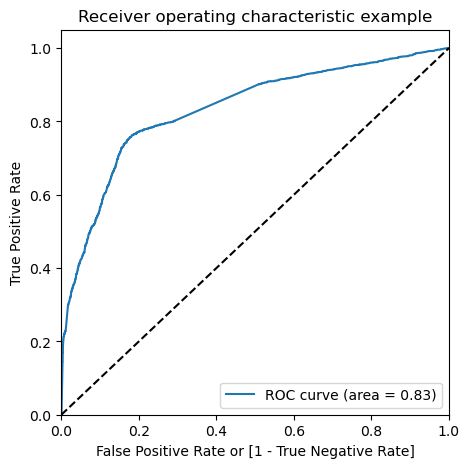

In [ ]:
ROC(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

For an ideal model, the ROC curve has area of 1. We have got an ROC area of 0.83. 
Closer a model is to 1 the better the model is considered. The ROC of 0.83 is an indication of a good model.

Step 9: Optimal Cutoff

First let us create columns with different probablity cutoffs

In [ ]:
elements = [float(x)/10 for x in range(10)]
for i in elements:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.202161,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.203512,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.238620,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.627234,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.202161,3934,0,1,1,1,0,0,0,0,0,0,0


Calculating Accuracy, sensitivity, Specificity for the different probablity cutoffs

In [ ]:
cut_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

pro = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in pro:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cut_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cut_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.414657  0.989457  0.060470
0.2   0.2  0.646722  0.901460  0.489755
0.3   0.3  0.796846  0.761557  0.818591
0.4   0.4  0.797001  0.707624  0.852074
0.5   0.5  0.782158  0.626521  0.878061
0.6   0.6  0.767471  0.537307  0.909295
0.7   0.7  0.749691  0.431062  0.946027
0.8   0.8  0.730056  0.333333  0.974513
0.9   0.9  0.694187  0.206407  0.994753


Let us plot them

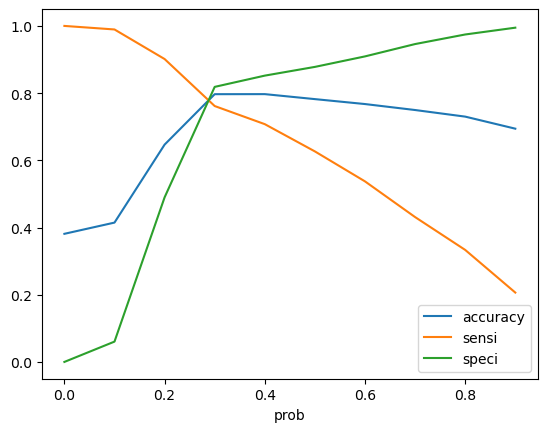

In [ ]:
cut_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [ ]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.202161,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.203512,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.238620,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.627234,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.202161,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.202161,1871,0,20
1,0,0.203512,6795,0,20
2,0,0.238620,3516,0,24
3,0,0.627234,8105,1,63
4,0,0.202161,3934,0,20


Let us now find out the total number of final predicted conversion as wells as non conversions from actual converted rates. 
Let us also check if 80% of the columns are correctly predicted based on the converted column.

In [ ]:
check_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
check_df['final_Predicted'].value_counts()

1    1921
0     545
Name: final_Predicted, dtype: int64

In [ ]:
1921/float(1921+545)

0.7789943227899432

We can observe that the final conversion has a traget of 77.8% conversion as per the X Educations CEO's requirement. Hence, we can say that this is a good model.

Metrics check

1. Confusion matric

In [ ]:
confusionn = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusionn

array([[3128,  874],
       [ 545, 1921]], dtype=int64)

In [ ]:
TP = confusionn[1,1] # true positive 
TN = confusionn[0,0] # true negatives
FP = confusionn[0,1] # false positives
FN = confusionn[1,0] # false negatives

2. Accuracy

In [ ]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7806122448979592

3.Sensitivity

In [ ]:
TP / float(TP+FN)

0.7789943227899432

4. Specificity

In [ ]:
TN / float(TN+FP)

0.7816091954022989

5. False Positive rate

In [ ]:
print(FP/ float(TN+FP))

0.21839080459770116


6.Positive predicted value

In [ ]:
print (TP / float(TP+FP))

0.687298747763864


7. Negative predicted value

In [ ]:
print (TN / float(TN+ FN))

0.8516199292131772


In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3128,  874],
       [ 545, 1921]], dtype=int64)

8. Precision

In [ ]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.687298747763864

9. Recall

In [ ]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7789943227899432

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.687298747763864

In [ ]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7789943227899432

Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

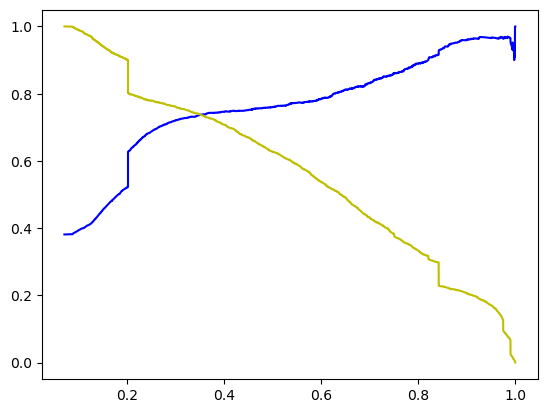

In [ ]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "y-")
plt.show()

step 10: Predictions on test set

In [ ]:
X_test[["TotalVisits",'Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[["TotalVisits",'Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Working Professional
4269,1.748474,0.964504,2.109982,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,-1.121955,-0.885371,-1.234699,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7766,0.672063,-0.777416,1.552535,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9199,-1.121955,-0.885371,-1.234699,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4359,-1.121955,-0.885371,-1.234699,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Working Professional
4269,0.964504,0,1,0,0,0,0,0,0
2376,-0.885371,1,0,0,0,0,0,0,0
7766,-0.777416,0,0,0,1,0,0,0,1
9199,-0.885371,0,0,0,0,0,0,0,0
4359,-0.885371,1,0,0,0,0,0,0,0


In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

4269    0.422231
2376    0.841818
7766    0.743209
9199    0.202161
4359    0.841818
9186    0.327612
1631    0.521283
8963    0.196410
8007    0.221582
5324    0.164451
dtype: float64

Let us now convert y_pred to a dataframe

In [ ]:
y_predd = pd.DataFrame(y_test_pred)
y_predd.head()

,0
4269,0.422231
2376,0.841818
7766,0.743209
9199,0.202161
4359,0.841818


Let us now convert y_test to a dataframe

In [ ]:
y_test_df = pd.DataFrame(y_test)

Let us put prospect id to index

In [ ]:
y_test_df['Prospect ID'] = y_test_df.index

Let us remove the index for both the dataframes to append them side by side

In [ ]:
y_predd.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_predd],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.422231
1,1,2376,0.841818
2,1,7766,0.743209
3,0,9199,0.202161
4,1,4359,0.841818


Let us rename the column

In [ ]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,1,4269,0.422231
1,1,2376,0.841818
2,1,7766,0.743209
3,0,9199,0.202161
4,1,4359,0.841818


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,1,4269,0.422231,1
1,1,2376,0.841818,1
2,1,7766,0.743209,1
3,0,9199,0.202161,0
4,1,4359,0.841818,1


Let us now check if 80% of the columns are correctly are predicted based on the converted column

In [ ]:
checking1_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking1_df['final_predicted'].value_counts()

1    841
0    254
Name: final_predicted, dtype: int64

In [ ]:
841/float(841+254)

0.7680365296803653

Metrics check

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1306,  371],
       [ 254,  841]], dtype=int64)

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

Sensitivity 

In [ ]:
TP / float(TP+FN)

0.7680365296803653

Specificity

In [ ]:
TN / float(TN+FP)

0.7787716159809183

Precision 

In [ ]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.6938943894389439

Recall

In [ ]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7680365296803653

Conclusion

The scores we have recieved for Accuracy, Precision, and Recall for the test data is in the acceptable region

Accuracy, Sensitivity and Specificity values of test set are around 77% approximately closer to the values calculated using the training set

lead score calculated in the trained set of data shows the conversion rate on the final predicted model is close to 80% (i.e., 78%)
Hence overall this model seems to be good.

The probability expression of the model can be written as

𝑙𝑛(𝑝/1−𝑝)=−0.4024 + 1.0960 × 𝑇𝑜𝑡𝑎𝑙𝑇𝑖𝑚𝑒𝑆𝑝𝑒𝑛𝑡𝑜𝑛𝑊𝑒𝑏𝑠𝑖𝑡𝑒 + 3.0447 × 𝐿𝑒𝑎𝑑𝑂𝑟𝑖𝑔𝑖𝑛𝐿𝑒𝑎𝑑𝐴𝑑𝑑𝐹𝑜𝑟𝑚𝑦 − 0.9683 × 𝐿𝑒𝑎𝑑𝑆𝑜𝑢𝑟𝑐𝑒𝐷𝑖𝑟𝑒𝑐𝑡𝑇𝑟𝑎𝑓𝑓𝑖𝑐 − 0.9582 × 𝐿𝑒𝑎𝑑𝑆𝑜𝑢𝑟𝑐𝑒𝐹𝑎𝑐𝑒𝑏𝑜𝑜𝑘 − 0.5735 × 𝐿𝑒𝑎𝑑𝑆𝑜𝑢𝑟𝑐𝑒𝐺𝑜𝑜𝑔𝑙𝑒𝑟 − 0.7163 × 𝐿𝑒𝑎𝑑𝑆𝑜𝑢𝑟𝑐𝑒𝑂𝑟𝑔𝑎𝑛𝑖𝑐𝑆𝑒𝑎𝑟𝑐ℎ − 1.1980 × 𝐿𝑒𝑎𝑑𝑆𝑜𝑢𝑟𝑐𝑒𝑅𝑒𝑓𝑒𝑟𝑟𝑎𝑙𝑆𝑖𝑡𝑒𝑠 + 1.9739 × 𝐿𝑒𝑎𝑑𝑆𝑜𝑢𝑟𝑐𝑒𝑊𝑒𝑙𝑖𝑛𝑔𝑎𝑘𝑊𝑒𝑏𝑠𝑖𝑡𝑒 + 1.9739 × 𝑊ℎ𝑎𝑡𝑖𝑠𝑦𝑜𝑢𝑟𝑐𝑢𝑟𝑟𝑒𝑛𝑡𝑜𝑐𝑐𝑢𝑝𝑎𝑡𝑖𝑜𝑛𝑊𝑜𝑟𝑘𝑖𝑛𝑔𝑃𝑟𝑜𝑓𝑒𝑠𝑠𝑖𝑜𝑛𝑎𝑙

- A customer Lead sourced by "Welingak Website" is a Hot Lead.
- A customer who is currently "Working Professional" or "Unemployed" is a Hot Lead.
- Total Time Spent on Website gets high conversion